In [1]:
!unzip data\ \(2\).zip
!rm data\ \(2\).zip

Archive:  data (2).zip
   creating: data/Areas Urbanas/
  inflating: data/Areas Urbanas/areas_urbanas.dbf  
  inflating: data/Areas Urbanas/areas_urbanas.prj  
  inflating: data/Areas Urbanas/areas_urbanas.sbn  
  inflating: data/Areas Urbanas/areas_urbanas.sbx  
  inflating: data/Areas Urbanas/areas_urbanas.shp  
  inflating: data/Areas Urbanas/areas_urbanas.shp.xml  
  inflating: data/Areas Urbanas/areas_urbanas.shx  
  inflating: data/Areas Urbanas/Disclaimer.txt  
   creating: data/Distritos Censales/
  inflating: data/Distritos Censales/centroides Distritos Censales RM.dbf  
  inflating: data/Distritos Censales/centroides Distritos Censales RM.prj  
  inflating: data/Distritos Censales/centroides Distritos Censales RM.qpj  
  inflating: data/Distritos Censales/centroides Distritos Censales RM.shp  
  inflating: data/Distritos Censales/centroides Distritos Censales RM.shx  
  inflating: data/Distritos Censales/Distritos Censales RM.dbf  
  inflating: data/Distritos Censales/Distrit

In [2]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 2.9 MB/s eta 0:00:00


In [3]:
import networkx as nx
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import math

In [4]:
areas_urbanas = gpd.read_file('data/Areas Urbanas/areas_urbanas.shp')
distritos = gpd.read_file('data/Distritos Censales/centroides Distritos Censales RM.shp')
estaciones = gpd.read_file('/content/data/Metro 2020/Estaciones_2020/Estaciones_2020.shp')
lineas_metro = gpd.read_file('/content/data/Metro 2020/Lineas_2020/Lineas_2020.shp')
paradas = gpd.read_file('/content/data/Paradas/Paradas 020320.shp')

# Misión 1

In [5]:
biblio = (-33.4982682514472, -70.60995248358769)
fantasilandia = (-33.46012560654014, -70.66255437200533)

In [6]:
areas_urbanas.to_crs("EPSG:4326", inplace=True)
santiago_urbano = areas_urbanas.loc[areas_urbanas['NOMBRE']=='Santiago']

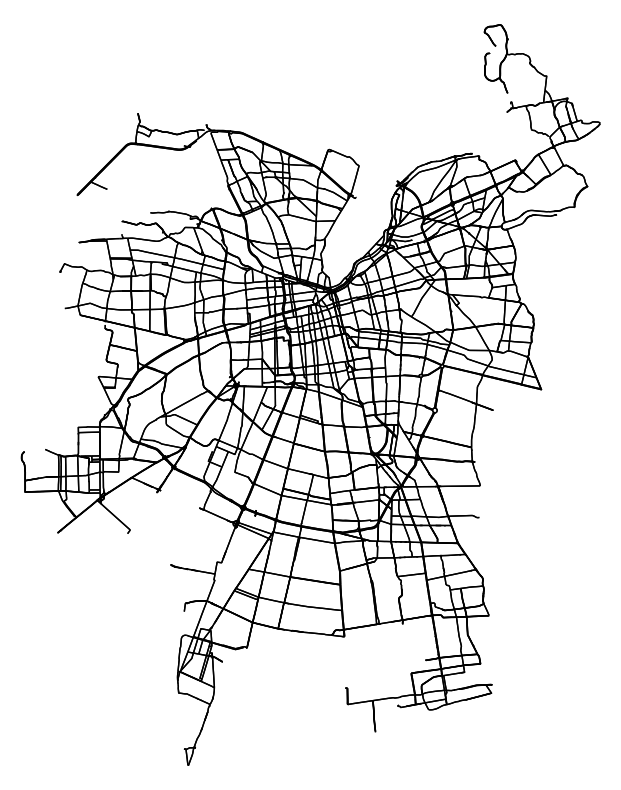

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [7]:
graph_walk = ox.graph.graph_from_polygon(santiago_urbano.geometry.item(), custom_filter='["highway"~"primary|secondary"]', network_type='walk')

graph_walk = ox.add_edge_speeds(graph_walk, hwy_speeds={'walk': 7})

ox.plot_graph(graph_walk, figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

In [8]:
node_biblioteca = ox.distance.nearest_nodes(graph_walk, biblio[1], biblio[0])
node_fantasilandia = ox.distance.nearest_nodes(graph_walk, fantasilandia[1], fantasilandia[0])

walk_route = nx.shortest_path(graph_walk, node_biblioteca, node_fantasilandia, weight='travel_time')

# Calcular ruta en metro (puedes ajustar el network_type según el tipo de transporte que desees)
metro_graph = ox.graph_from_polygon(santiago_urbano.geometry.item(), network_type='all')
metro_route = nx.shortest_path(metro_graph, node_biblioteca, node_fantasilandia, weight='travel_time')

# Calcular ruta en automóvil
car_graph = ox.graph_from_polygon(santiago_urbano.geometry.item(), network_type='drive')
car_route = nx.shortest_path(car_graph, node_biblioteca, node_fantasilandia, weight='travel_time')

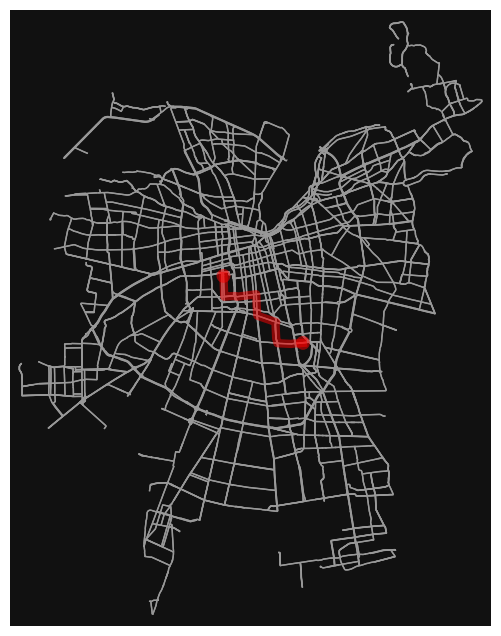

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [9]:
# Visualizar las rutas en un mapa
ox.plot_graph_route(graph_walk, walk_route, route_linewidth=6, node_size=0)

In [23]:
nx.shortest_path_length(graph_walk, node_biblioteca, node_fantasilandia, weight='travel_time')

20

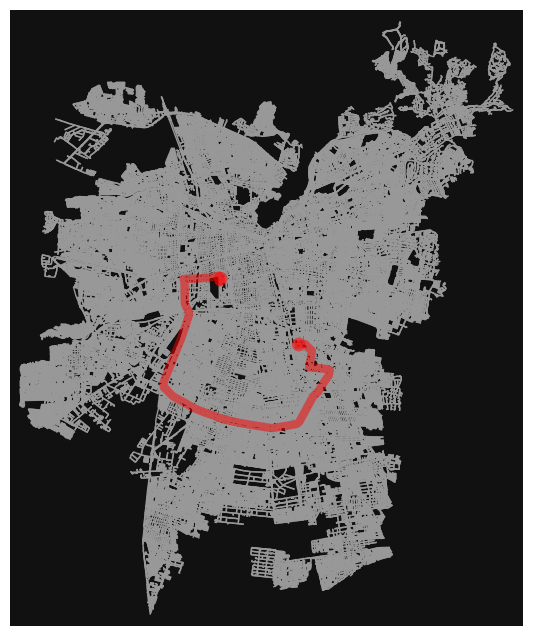

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [10]:
# Visualizar las rutas en un mapa
ox.plot_graph_route(metro_graph, metro_route, route_linewidth=6, node_size=0)

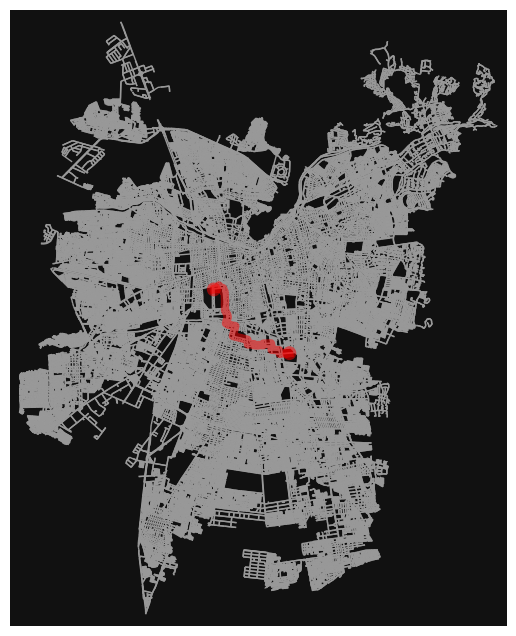

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [11]:
# Visualizar las rutas en un mapa
ox.plot_graph_route(car_graph, car_route, route_linewidth=6, node_size=0)

# Misión 2

In [12]:
distritos.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,POINT (347255.676 6298958.015)
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,POINT (346388.173 6298891.253)
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,POINT (345804.699 6298808.712)
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,POINT (345288.057 6298448.534)
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,POINT (344391.946 6297945.192)


In [24]:
paradas.head()

,ID,CODINFRA,SIMT,COMUNA,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS,geometry
0,917,L-13-63-5-NS,PI317,MAIPÚ,MAIPÚ,CALETERA CAMINO A MELIPILLA,LAGO BRACCIANO,Central Poniente / esq. Lago Bracciano,333352.2096,6.285793e+06,0,NaN,None,27.5,2482.0,31.000000,2856.333333,6,111I;113R;113eR;113cR;350R;I11R,POINT (333352.210 6285793.364)
1,918,L-13-63-10-PO,PI307,MAIPÚ,MAIPÚ,LAS ARALIAS,LAGO DE COMO,Central Poniente / esq. Lago de Como,333556.9557,6.285602e+06,0,NaN,None,27.5,2482.0,31.000000,2856.333333,6,111I;113R;113eR;113cR;350R;I11R,POINT (333556.956 6285602.347)
2,941,L-13-61-10-OP,PI269,MAIPÚ,MAIPÚ,LIQUIDAMBAR 4,LAGO DE COMO,Central Oriente / esq. Lago de Como,333620.3706,6.285625e+06,0,NaN,None,35.0,3264.0,22.666667,2008.333333,6,111R;113I;113eI;113cI;350I;I11I,POINT (333620.371 6285624.741)
3,920,L-13-63-20-PO,PI309,MAIPÚ,MAIPÚ,EL CACTUS,LAGO CASTELGANDOLFO,Central Poniente / esq. Castelgandolfo,334004.8629,6.285199e+06,0,NaN,None,27.5,2482.0,31.000000,2856.333333,6,111I;113R;113eR;113cR;350R;I11R,POINT (334004.863 6285199.223)
4,939,L-13-61-20-OP,PI267,MAIPÚ,MAIPÚ,EL HELECHO NORTE,LAGO CASTELGANDOLFO,Central Oriente / esq. Castelgandolfo,334032.7925,6.285254e+06,0,NaN,None,35.0,3264.0,22.666667,2008.333333,6,111R;113I;113eI;113cI;350I;I11I,POINT (334032.792 6285254.391)


In [13]:
distritos.to_crs("EPSG:4326", inplace=True)
centro = distritos.loc[distritos['NOM_DIS'] == 'Moneda']
centro = centro['geometry']

In [35]:
top_4_dists = []

comunas_ocupadas = []

dict_parada = {}

for index, row in paradas.iterrows():
    dict_parada[str([row['geometry'].y, row['geometry'].x])] = row['COMUNA']
    if len(top_4_dists) == 0:
        top_4_dists.append([row['geometry'].y, row['geometry'].x])
        comunas_ocupadas.append(row['COMUNA'])
    else:
        if math.dist([centro.y, centro.x], [row['geometry'].y, row['geometry'].x]) > math.dist([centro.y, centro.x], top_4_dists[0]):
            if len(top_4_dists) > 1:
                if math.dist([centro.y, centro.x], [row['geometry'].y, row['geometry'].x]) > math.dist([centro.y, centro.x], top_4_dists[1]):
                    if len(top_4_dists) > 2:
                        if math.dist([centro.y, centro.x], [row['geometry'].y, row['geometry'].x]) > math.dist([centro.y, centro.x], top_4_dists[2]):
                            if len(top_4_dists) > 3:
                                if math.dist([centro.y, centro.x], [row['geometry'].y, row['geometry'].x]) > math.dist([centro.y, centro.x], top_4_dists[3]):
                                    if not(row['COMUNA'] in comunas_ocupadas):
                                        top_4_dists.append([row['geometry'].y, row['geometry'].x])
                                        comunas_ocupadas.append(row['COMUNA'])
                        else:
                            if not(row['COMUNA'] in comunas_ocupadas):
                                comunas_ocupadas.append(row['COMUNA'])
                                top_4_dists = top_4_dists[:3] + [[row['geometry'].y, row['geometry'].x]] + top_4_dists[3:]
                    else:
                        if not(row['COMUNA'] in comunas_ocupadas):
                            comunas_ocupadas.append(row['COMUNA'])
                            top_4_dists = top_4_dists[:2] + [[row['geometry'].y, row['geometry'].x]] + top_4_dists[2:]
                else:
                    if not(row['COMUNA'] in comunas_ocupadas):
                        comunas_ocupadas.append(row['COMUNA'])
                        top_4_dists = top_4_dists[:1] + [[row['geometry'].y, row['geometry'].x]] + top_4_dists[1:]
            else:
                if not(row['COMUNA'] in comunas_ocupadas):
                    comunas_ocupadas.append(row['COMUNA'])
                    top_4_dists = [[row['geometry'].y, row['geometry'].x]] + top_4_dists[:]
        if len(top_4_dists) > 4:
            aux = top_4_dists.pop(0)
            comunas_ocupadas.remove(dict_parada[str(aux)])

In [36]:
top_4_points = []

for i in range(len(top_4_dists)):
    print(top_4_dists[i])
    point = ox.distance.nearest_nodes(metro_graph, top_4_dists[i][0], top_4_dists[i][1])
    top_4_points.append(point)

print(top_4_points)

[6304902.832394356, 353152.52731854556]
[6307027.578365361, 342875.30843972013]
[6305738.619009608, 357848.9206124471]
[6306965.5809903685, 356292.99391239975]
[3238763972, 1516988340, 6008754541, 9566270521]


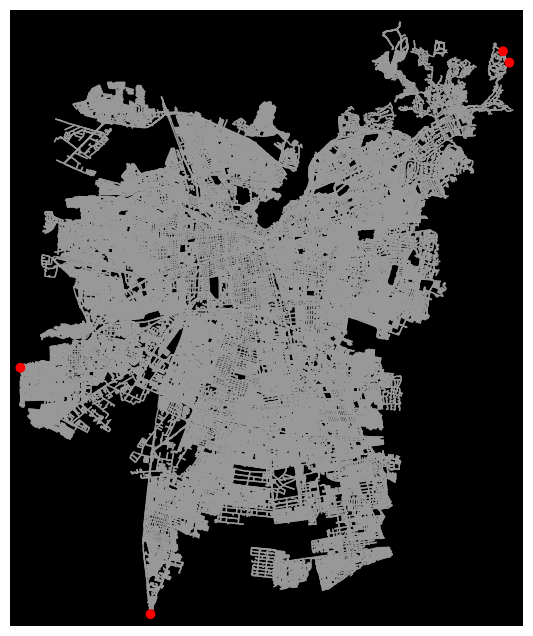

In [37]:
# Resaltar los nodos específicos en rojo
nc = ['r' if node in top_4_points else 'b' for node in metro_graph.nodes()]
ns = [50 if node in top_4_points else 0 for node in metro_graph.nodes()]
fig, ax = ox.plot_graph(metro_graph, node_color=nc, node_size=ns, bgcolor='k', show=False, close=False)

plt.show()

In [38]:
import itertools

In [44]:
permutaciones = itertools.permutations(top_4_points)
for camino in permutaciones:
    print(camino)

(3238763972, 1516988340, 6008754541, 9566270521)
(3238763972, 1516988340, 9566270521, 6008754541)
(3238763972, 6008754541, 1516988340, 9566270521)
(3238763972, 6008754541, 9566270521, 1516988340)
(3238763972, 9566270521, 1516988340, 6008754541)
(3238763972, 9566270521, 6008754541, 1516988340)
(1516988340, 3238763972, 6008754541, 9566270521)
(1516988340, 3238763972, 9566270521, 6008754541)
(1516988340, 6008754541, 3238763972, 9566270521)
(1516988340, 6008754541, 9566270521, 3238763972)
(1516988340, 9566270521, 3238763972, 6008754541)
(1516988340, 9566270521, 6008754541, 3238763972)
(6008754541, 3238763972, 1516988340, 9566270521)
(6008754541, 3238763972, 9566270521, 1516988340)
(6008754541, 1516988340, 3238763972, 9566270521)
(6008754541, 1516988340, 9566270521, 3238763972)
(6008754541, 9566270521, 3238763972, 1516988340)
(6008754541, 9566270521, 1516988340, 3238763972)
(9566270521, 3238763972, 1516988340, 6008754541)
(9566270521, 3238763972, 6008754541, 1516988340)
(9566270521, 1516988

In [39]:
permutaciones = itertools.permutations(top_4_points)
dest = ox.distance.nearest_nodes(metro_graph, centro.y, centro.x)

camino_menor = ''
ruta_menor = 10000

for camino in permutaciones:
    paso1 = nx.shortest_path_length(metro_graph, camino[0], camino[1], weight='travel_time')
    paso2 = nx.shortest_path_length(metro_graph, camino[1], camino[2], weight='travel_time')
    paso3 = nx.shortest_path_length(metro_graph, camino[2], camino[3], weight='travel_time')

    if paso1 + paso2 + paso3 < ruta_menor:
        ruta_menor = paso1 + paso2 + paso3
        camino_menor = camino

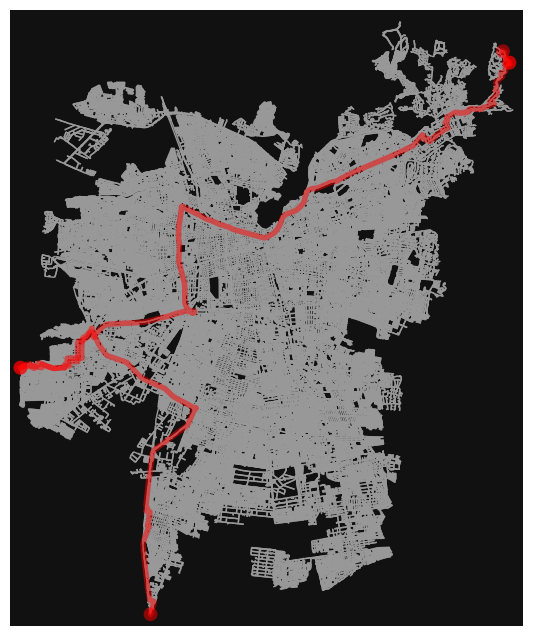

In [40]:
route = []
for i in range(len(camino_menor) - 1):
    node_pair = (camino_menor[i], camino_menor[i + 1])
    # Obtener el camino más corto entre nodos consecutivos
    path = nx.shortest_path(metro_graph, source=node_pair[0], target=node_pair[1], weight='travel_time', method='dijkstra')
    # Agregar los arcos del camino a la lista
    route.append(path)

# Crear una gráfica para visualizar la ruta
fig, ax = ox.plot_graph_routes(metro_graph, route, route_color=['r', 'r', 'r', 'r'], route_linewidth=5, node_size=0, show=False, close=False)

plt.show()